In [1]:
pip install opencv-python-headless tensorflow deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=b75d97aa44f83b793b3fedec36fef15d0e423df0e5e694c2392a9699d5302d15
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [2]:
from deepface import DeepFace

def find_face(image_path, db_path):
    result = DeepFace.find(img_path=image_path, db_path=db_path)
    return result["identity"]


24-01-25 16:38:00 - Directory /root/.deepface created
24-01-25 16:38:00 - Directory /root/.deepface/weights created


In [3]:
pip install opencv-python tensorflow deepface


In [4]:
import cv2
from deepface import DeepFace

# Function for detecting faces using OpenCV
def detect_faces(frame, face_cascade):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return [(x, y, x+w, y+h) for (x, y, w, h) in faces]

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function for recognizing faces using DeepFace
def find_face(image_path, db_path):
    result = DeepFace.find(img_path=image_path, db_path=db_path)
    return result["identity"]

cap = cv2.VideoCapture(0)  # '0' indicates the default webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect faces in the frame
    face_coordinates = detect_faces(frame, face_cascade)

    for (x1, y1, x2, y2) in face_coordinates:
        face_img = frame[y1:y2, x1:x2]
        temp_filename = "harwinder.jpg"
        cv2.imwrite(temp_filename, face_img)
        match = find_face(temp_filename, "/content/Harwinder singh sandhu")

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, match, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Face Recognition", frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image
take_photo()


<IPython.core.display.Javascript object>

'photo.jpg'

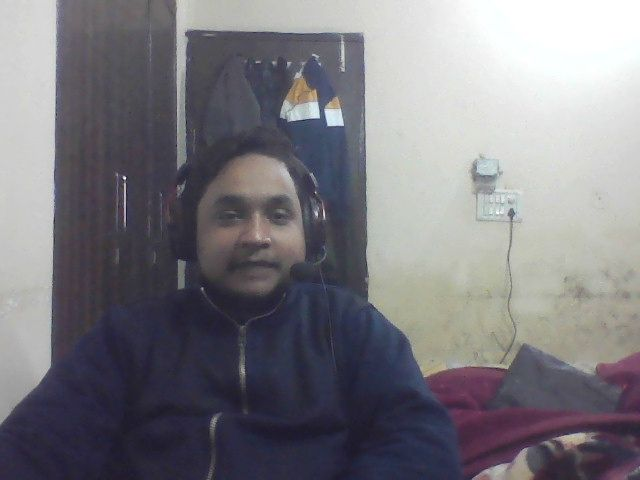

In [6]:
from PIL import Image
from IPython.display import display

image_path = "photo.jpg"
img = Image.open(image_path)
display(img)


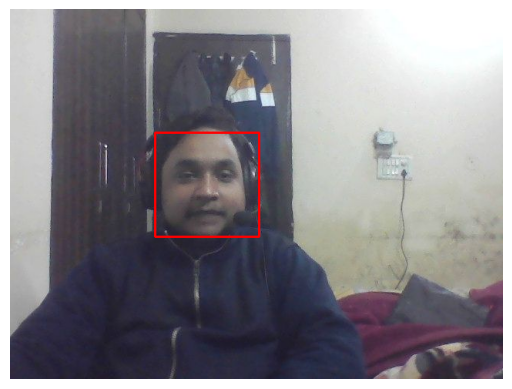

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the Haar cascade xml file for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read image using OpenCV
image = cv2.imread(image_path)

# Convert the BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Draw rectangles around the detected faces
for (x,y,w,h) in faces:
    cv2.rectangle(image_rgb,(x,y),(x+w,y+h),(255,0,0),2)

# Display the output
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [10]:
from deepface import DeepFace

for (x,y,w,h) in faces:
    face_img = image_rgb[y:y+h, x:x+w]
    temp_filename = "detected_face.jpg"
    plt.imsave(temp_filename, face_img)

    # Use DeepFace to find the most similar face from the database
    db_path = "/content/Criminals"
    result = DeepFace.find(img_path=temp_filename, db_path=db_path)

Finding representations:   0%|          | 0/2 [00:00<?, ?it/s]

24-01-25 16:41:09 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 1.05M/580M [00:00<01:06, 8.69MB/s]
  0%|          | 2.62M/580M [00:00<00:46, 12.4MB/s]
  1%|          | 5.24M/580M [00:00<00:33, 17.0MB/s]
  2%|▏         | 8.91M/580M [00:00<00:24, 23.1MB/s]
  2%|▏         | 12.6M/580M [00:00<00:20, 27.5MB/s]
  3%|▎         | 16.8M/580M [00:00<00:18, 31.0MB/s]
  4%|▎         | 21.0M/580M [00:00<00:16, 33.5MB/s]
  4%|▍         | 25.2M/580M [00:00<00:15, 35.0MB/s]
  5%|▌         | 29.4M/580M [00:00<00:15, 36.2MB/s]
  6%|▌         | 33.6M/580M [00:01<00:14, 37.1MB/s]
  7%|▋         | 37.7M/580M [00:01<00:14, 37.7MB/s]
  7%|▋         | 41.9M/580M [00:01<00:13, 38.6MB/s]
  8%|▊         | 46.1M/580M [00:01<00:13, 38.9MB/s]
  9%|▊         | 50.3M/580M [00:01<00:13, 39.2MB/s]
  9%|▉         | 54.5M/580M [00:01<00:13, 39.6MB/s]
 10%|█         | 58.

24-01-25 16:41:24 - Representations stored in /content/Criminals/representations_vgg_face.pkl file.
24-01-25 16:41:25 - find function lasts 17.789591073989868 seconds


In [11]:
import os
import shutil


In [12]:
db_path = "/content/Criminals"


try:
    result = DeepFace.find(img_path=temp_filename, db_path=db_path, enforce_detection=True)

    if result:
        most_similar_face = result[0]
        print(most_similar_face["identity"])
    else:
        print("No match found.")
        unmatched_folder = "/content/Unmatched"
        if not os.path.exists(unmatched_folder):
            os.makedirs(unmatched_folder)
        shutil.move(temp_filename, os.path.join(unmatched_folder, os.path.basename(temp_filename)))

except ValueError:
    print("Face could not be detected in the image.")
    undetected_folder = "/content/Unmatched"
    if not os.path.exists(undetected_folder):
        os.makedirs(undetected_folder)
    shutil.move(temp_filename, os.path.join(undetected_folder, os.path.basename(temp_filename)))



24-01-25 16:41:48 - There are 2 representations found in representations_vgg_face.pkl
24-01-25 16:41:49 - find function lasts 0.7587451934814453 seconds
0    /content/Criminals/detected_face.jpg
1            /content/Criminals/photo.jpg
Name: identity, dtype: object


In [13]:
pip install requests


In [14]:
import requests

def get_geolocation(ip_address=None):
    access_token = "89be7540018e22"
    url = "https://ipinfo.io/103.65.31.156/json?token=89be7540018e22"

    response = requests.get(url)
    data = response.json()

    return data

# Usage:
ip = "8.8.8.8"
location_data = get_geolocation(ip)
#print(location_data)
print(f"ALERT! Suspect Found from {location_data['city']}, {location_data['region']}, {location_data['country']}. IP: {location_data['ip']}")


ALERT! Suspect Found from Delhi, Delhi, IN. IP: 103.65.31.156
